In [5]:
import numpy as np
from derivative import *

from zeta import *




In [6]:
d = np.array([2,1,0])

In [7]:
##import data from file if exists

folder_name = "d_" + str(d).replace(" ", "").replace("[", "").replace("]", "")
path = "roots_zeta/" + folder_name + "/data.npz"
data = np.load(path)

q_2 = data['q_2']
z_d_results = data['z_d_results']
roots = data['zeros']
asymototes = data['asymptotes']
q_2_plot = np.copy(q_2)
zeta_plot = np.copy(z_d_results)

nth_root = 0
x_0  = roots[nth_root]


In [193]:
x_0

0.47289424725966334

In [194]:


value = derivative_LT(x_0, 10000, d, alpha = 0, S=0)
print(value)

11.17929869964798


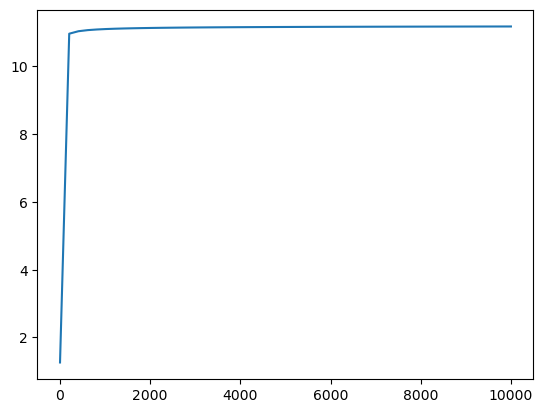

In [195]:
#generate list varying the cutoff from 0 to 1e4 of values ang graph
cutoff = np.linspace(0, 1e4, 50)
values = []
for c in cutoff:
    values.append(derivative_LT(x_0, c, d, alpha = 0, S=0))

import matplotlib.pyplot as plt
plt.plot(cutoff, values)
plt.show()


In [196]:


def derivative_sum_LT_2(q_2_star=1.5, cutoff=9, d = np.array([0,0,0]), m_tilde_sq = (4/(np.pi))**2, alpha = -1, beta  =0 , gamma = 1):

    d_scalar = np.linalg.norm(d)
    if d_scalar:
        beta_norm = d/np.linalg.norm(d) 
    else:
        beta_norm = d
     
    #create spherical shell containing the n vectors
    rng = np.arange(-int(np.sqrt(cutoff))-1, int(np.sqrt(cutoff))+2)
    res = (rng[:,np.newaxis, np.newaxis]**2+rng[np.newaxis,:,np.newaxis]**2+rng[np.newaxis,np.newaxis,:]**2)
    X,Y,Z = np.meshgrid(rng,rng,rng, indexing = 'ij')
    coords = np.stack((X,Y,Z), axis=3)
    r = coords[res<=cutoff]

    ####### parallel and perp components of r
    r_2 = np.einsum("ij,ij->i", r,r)
    r_parallel  = np.einsum("ij,j->i", r, beta_norm)
    r_perp_sq = r_2 -r_parallel**2
    omega_r = np.sqrt(r_2+m_tilde_sq/4)

    #find r in com frame
    r_star_parallel = gamma*(r_parallel-omega_r*beta)
    r_star_sq = r_star_parallel**2 + r_perp_sq    
    omega_r_star = gamma*(omega_r -beta*r_parallel)

    #up to this point code equiv. to zeta_sum. But now the new part:

    x = q_2_star

    T = 1/omega_r*np.exp(-alpha*(r_star_sq-x))/(r_star_sq-x)
    
    s = m_tilde_sq+4*x

    T1 = alpha * np.sum(omega_r_star*T)
    T2 =  np.sum(omega_r_star*T/(r_star_sq-x))
    T3 = 2*beta/s * np.sum(r_star_parallel*T)
    T4 = -alpha* 4*beta/s * np.sum(r_star_parallel*omega_r_star**2*T)
    T5 = - 4*beta/s*np.sum(omega_r_star**2*r_star_parallel*T/(r_star_sq-x))

    return (T1,T2,T3,T4,T5)/np.sqrt(4*np.pi) 

def pv_derivative_LT_2(q_2, alpha):
    x = q_2
    pv = np.pi**2/np.sqrt(x)\
        *erfi(np.sqrt(alpha*x))
    return pv/np.sqrt(4*np.pi)


def derivative_LT_2(q_2_star=1.5, cutoff=9, d = np.array([0,0,0]),alpha = -1, S = -1):
    ML  = 4
    m_tilde_sq = (ML/np.pi)**2

    d_scalar = np.linalg.norm(d)
    #find beta and gamma
    if d_scalar:
        beta = d_scalar/np.sqrt(d_scalar**2 + 4*q_2_star + m_tilde_sq)
        gamma = 1/np.sqrt(1-beta**2)
    else:
        beta = 0
        gamma = 1

    #cutoff in com
    kappa = gamma*(np.sqrt(cutoff) - beta*np.sqrt(cutoff + 1/4*m_tilde_sq))

    #here recommended alpha is calculated
    if alpha == -1:
        alpha = np.round(10**(-(2*np.log(kappa)/np.log(10)-1.5)),9)
    else:
        alpha = alpha
    
    
    #derivative of sum and pv
    deriv_S = derivative_sum_LT_2(q_2_star, cutoff, d, m_tilde_sq, alpha, beta, gamma)+pv_derivative_LT_2(q_2_star, alpha)

    T1,T2,T3,T4,T5 = derivative_sum_LT_2(q_2_star, cutoff, d, m_tilde_sq, alpha, beta, gamma)
    
    #derivatives of beta wrt x
    #deriv_gamma = -2*beta**2*gamma/(m_tilde_sq+4*q_2_star)

    #using product rule
    return np.array([T1,T2,T3,T4,T5])


In [197]:
d = np.array([2,1,3])

value = derivative_LT_2(1, 40000, d, alpha = 0.1, S=0)
print(value)

[ 1.28284520e+01  4.18091254e+04  1.56124498e-07  3.81337790e-06
 -2.11818123e+04]


In [198]:
print(derivative_LT_2(x_0, 10000, d, alpha = 0, S=0))

[  0.         317.51776445 -55.39365004  -0.          95.98091573]


In [199]:
###### Comparing to Briceno
from zeta import *



In [200]:
q = 1

zeta(q, 1000, 0.1, np.array([1,1,0]), 9.13)



0.8671724309040933

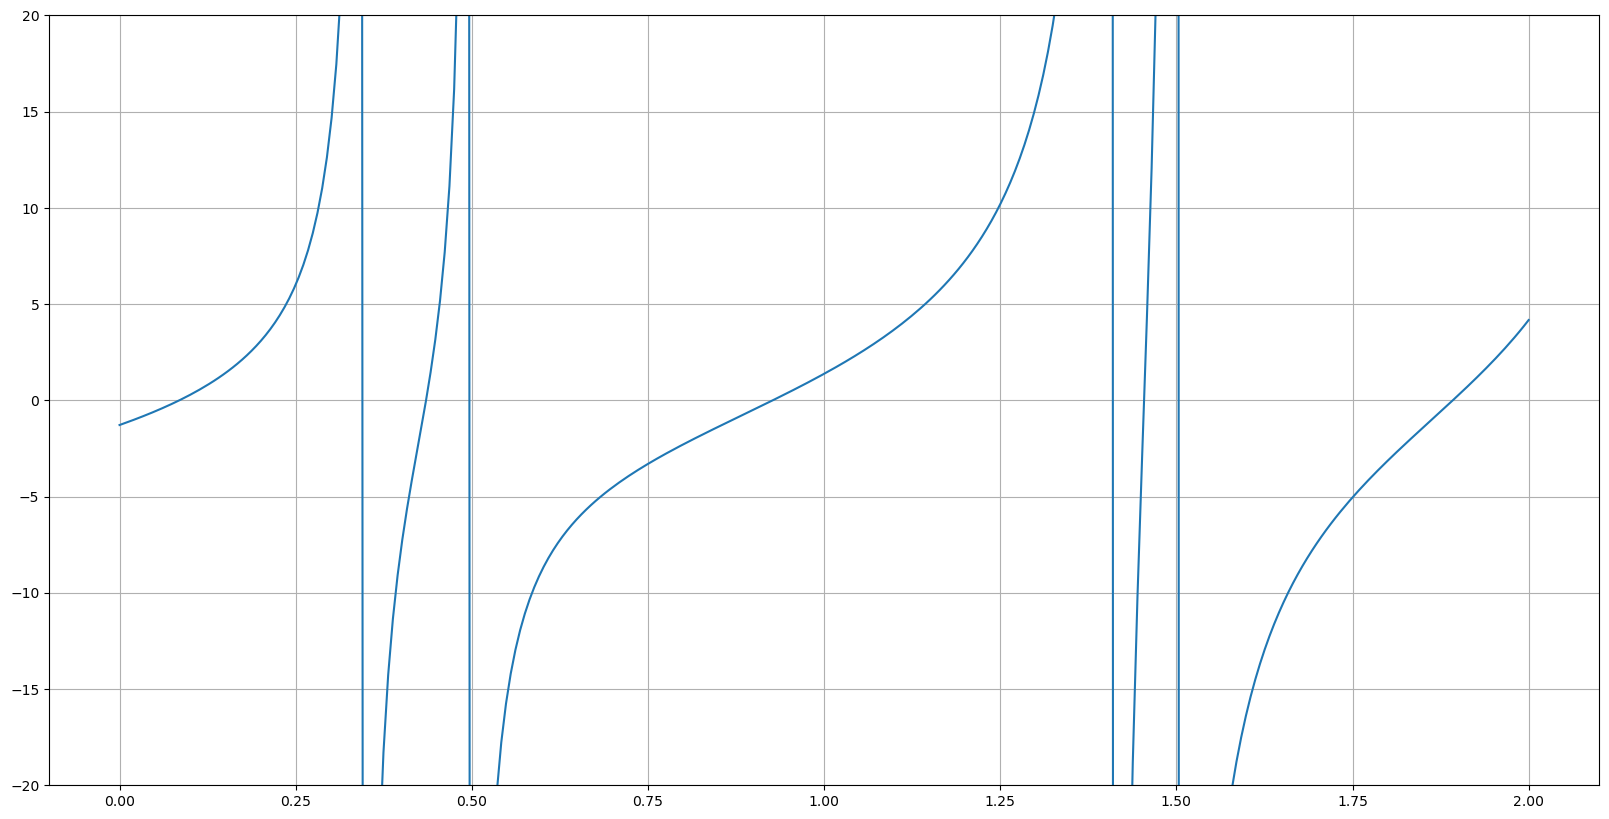

In [201]:
#graph zeta from q=0 to q=3

q = np.linspace(0,2,300)
zeta_plot = np.array([])
for q_i in q:
    zeta_plot = np.append(zeta_plot, zeta(q_i, 1000, 0.1, np.array([1,1,0]), 300*3.6/(197)))

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(q, zeta_plot)
plt.ylim(-20,20)
plt.grid()

plt.show()


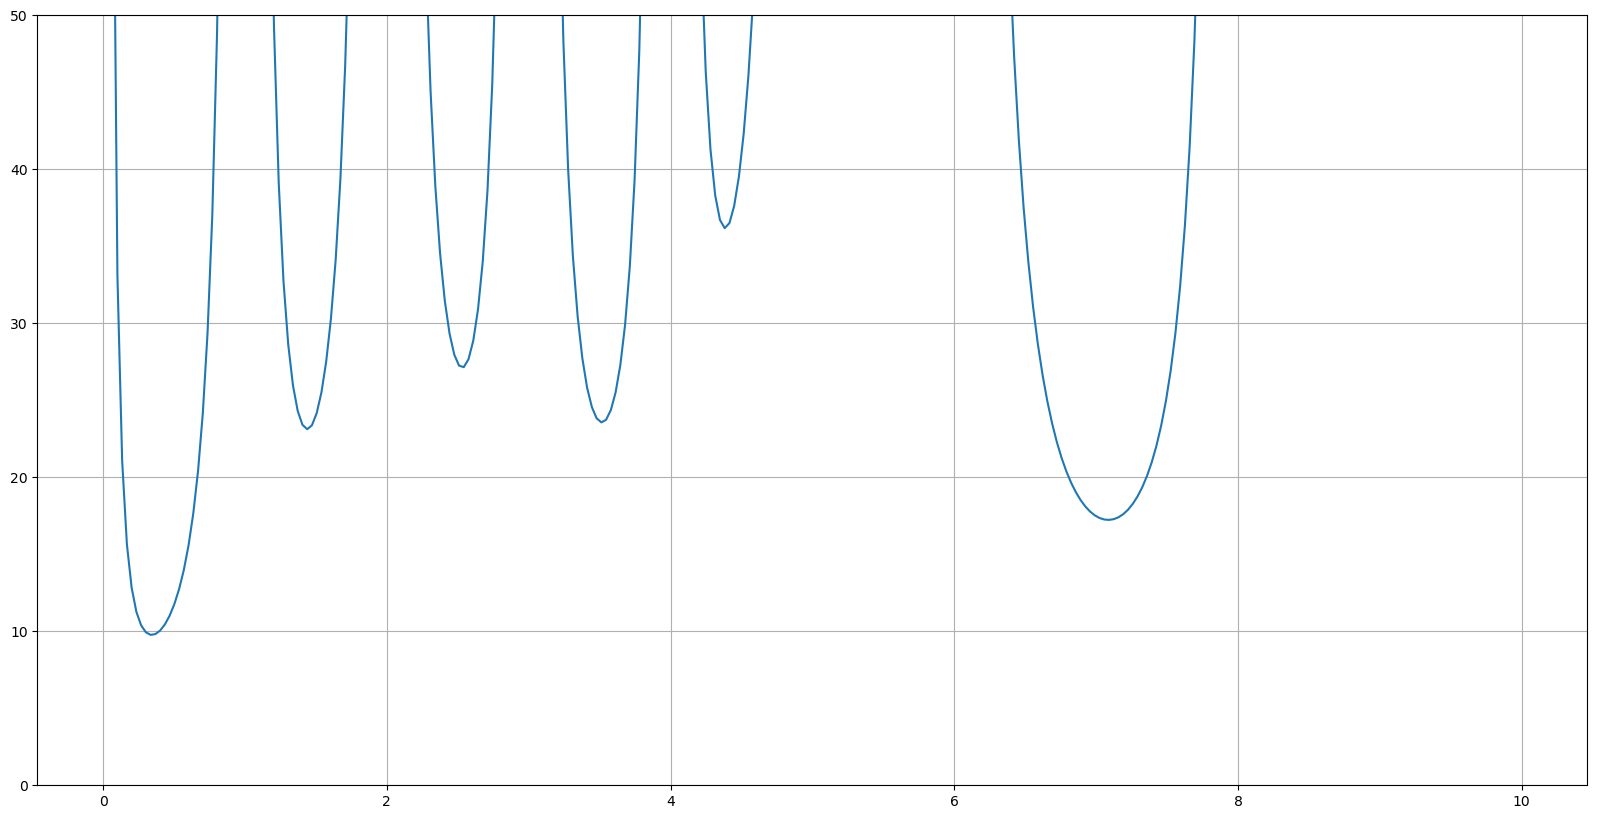

In [168]:
##compare derivative() to derivative_LT()

q = np.linspace(0,10,300)
derivative_plot = np.array([])
for q_i in q:
    derivative_plot = np.append(derivative_plot, derivative(q_i, 1000, 1))

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(q, derivative_plot)
plt.ylim(-0,50)
plt.grid()

plt.show()


/Users/ericrechberger/Library/CloudStorage/OneDrive-UniversityofEdinburgh/MPhys project/Code/MPhys-Code/derivative.py:39: RuntimeWarning: divide by zero encountered in divide
  original = omega_r_star/omega_r*np.exp(-alpha*(r_star_sq-q_2_star))/(r_star_sq-q_2_star)
/Users/ericrechberger/Library/CloudStorage/OneDrive-UniversityofEdinburgh/MPhys project/Code/MPhys-Code/derivative.py:42: RuntimeWarning: divide by zero encountered in divide
  term_1= original*(alpha+1/(r_star_sq-q_2_star))
/Users/ericrechberger/Library/CloudStorage/OneDrive-UniversityofEdinburgh/MPhys project/Code/MPhys-Code/derivative.py:43: RuntimeWarning: invalid value encountered in divide
  term_2 = (2*beta)/(m_tilde_sq+4*x) * 1/omega_r \
/Users/ericrechberger/Library/CloudStorage/OneDrive-UniversityofEdinburgh/MPhys project/Code/MPhys-Code/derivative.py:46: RuntimeWarning: divide by zero encountered in divide
  *(1- 2*omega_r_star**2*(alpha+1/(r_star_sq-x)))
/Users/ericrechberger/Library/CloudStorage/OneDrive-Univers

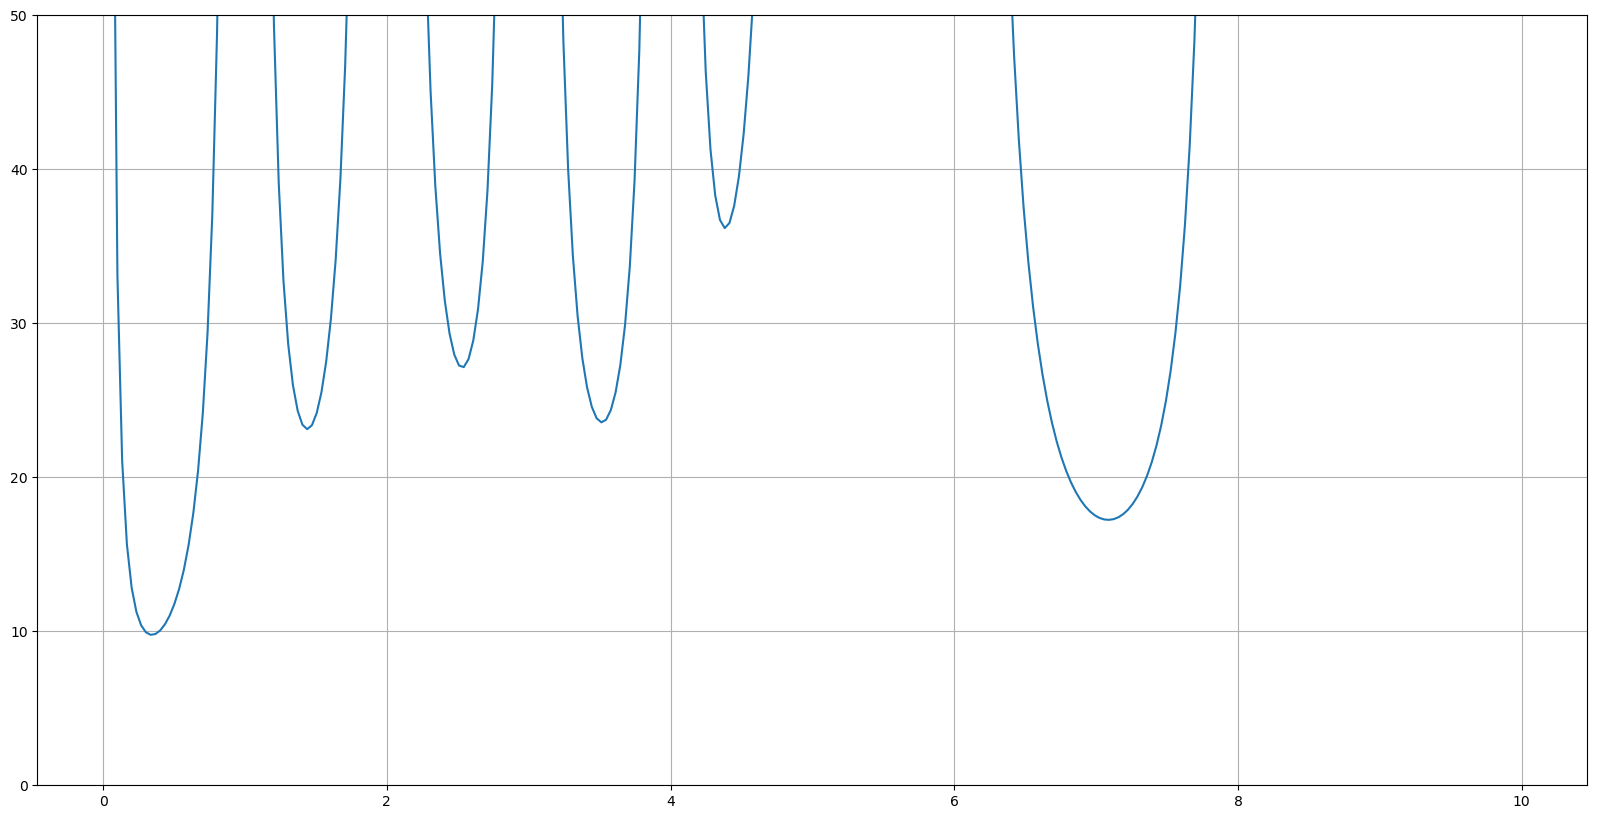

In [187]:
q = np.linspace(0,10,300)
derivative_plot1 = np.array([])
for q_i in q:
    derivative_plot1 = np.append(derivative_plot1, derivative_LT(q_i, 1000,np.array([0,0,0]),0.000001))


plt.figure(figsize=(20,10))
plt.plot(q, derivative_plot1)
plt.ylim(-0,50)
plt.grid()

plt.show()

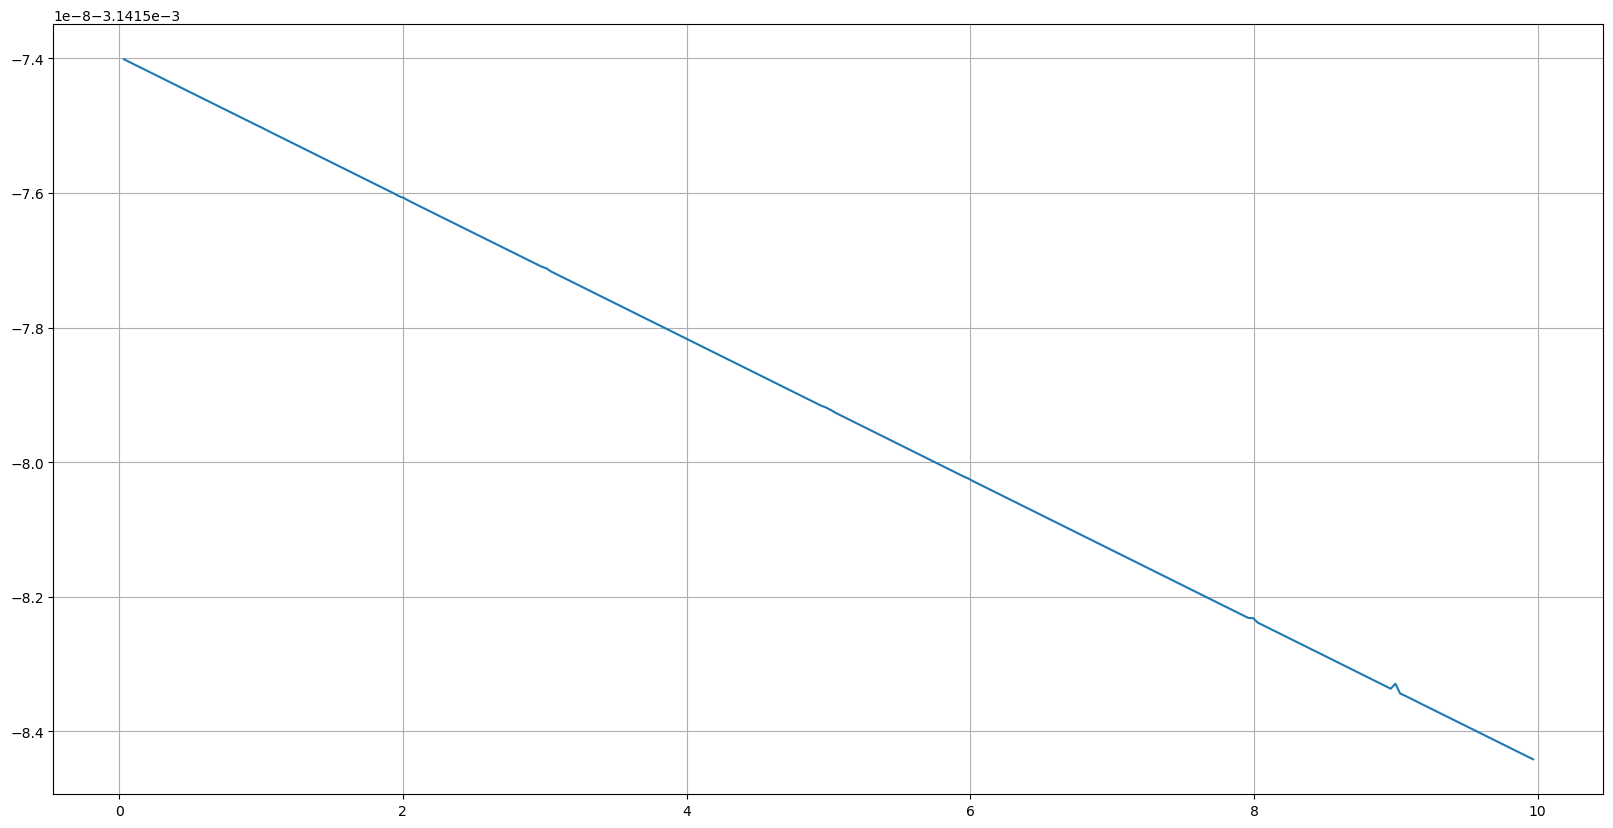

In [189]:
#plot difference between derivative and derivative_LT

plt.figure(figsize=(20,10))
plt.plot(q, derivative_plot-derivative_plot1)

plt.grid()


In [1]:
from zeta import *

2.465285621179456e-14


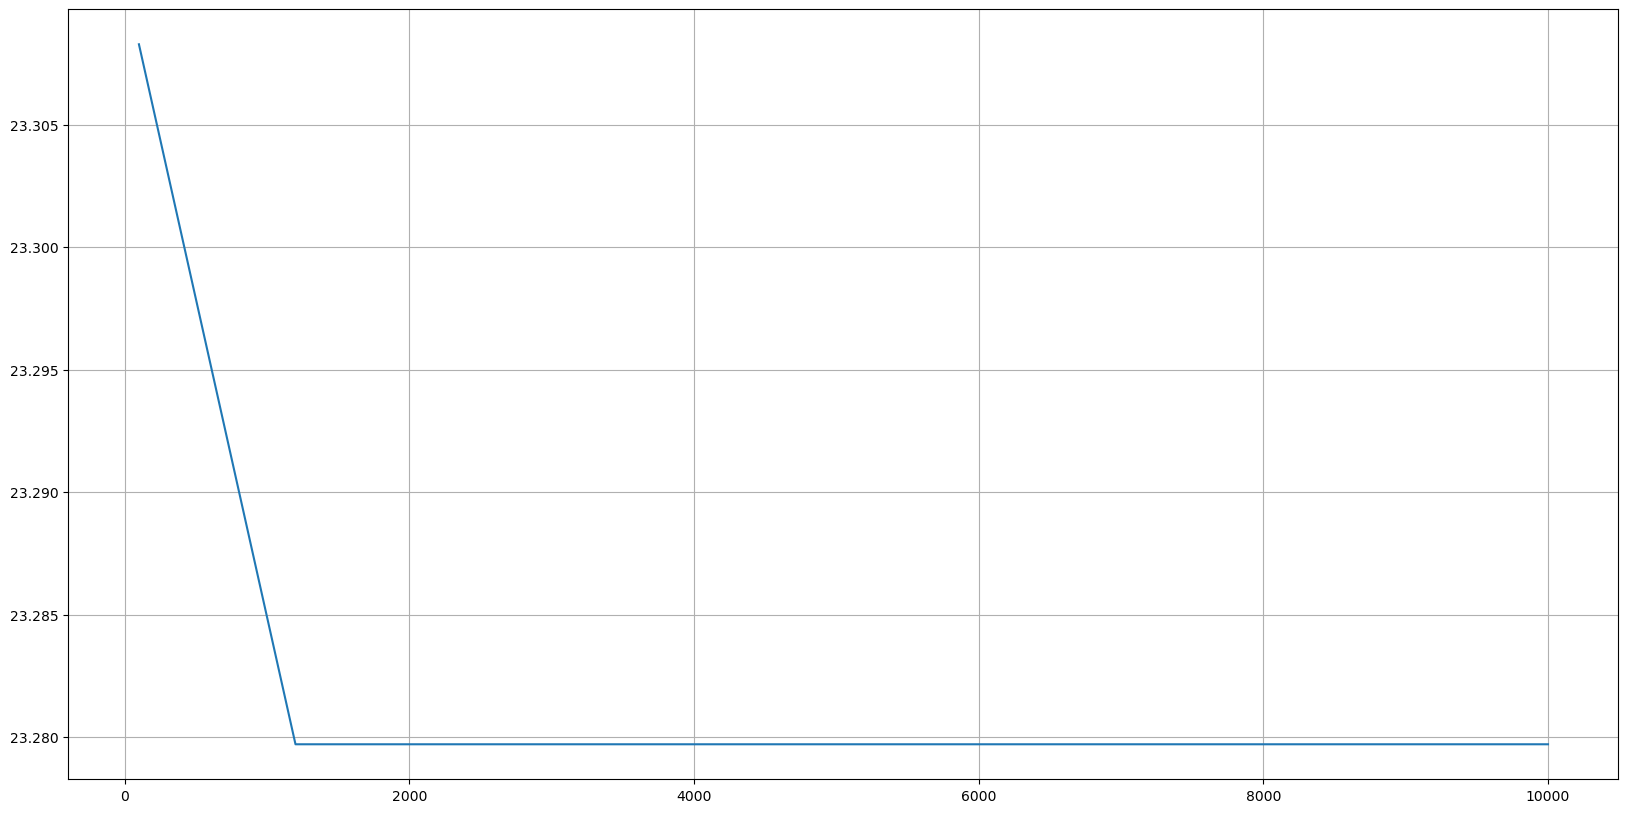

In [31]:

alpha = 0.2


#plot convergence of first_deriv vs xi range 0 to 1000 

xi = np.linspace(100,10000,10)
first_deriv_plot = np.array([])
for xi_i in xi:
    first_deriv_plot = np.append(first_deriv_plot, first_deriv(x_0, d, xi_i,alpha))

plt.figure(figsize=(20,10))
plt.plot(xi, first_deriv_plot)
plt.grid()


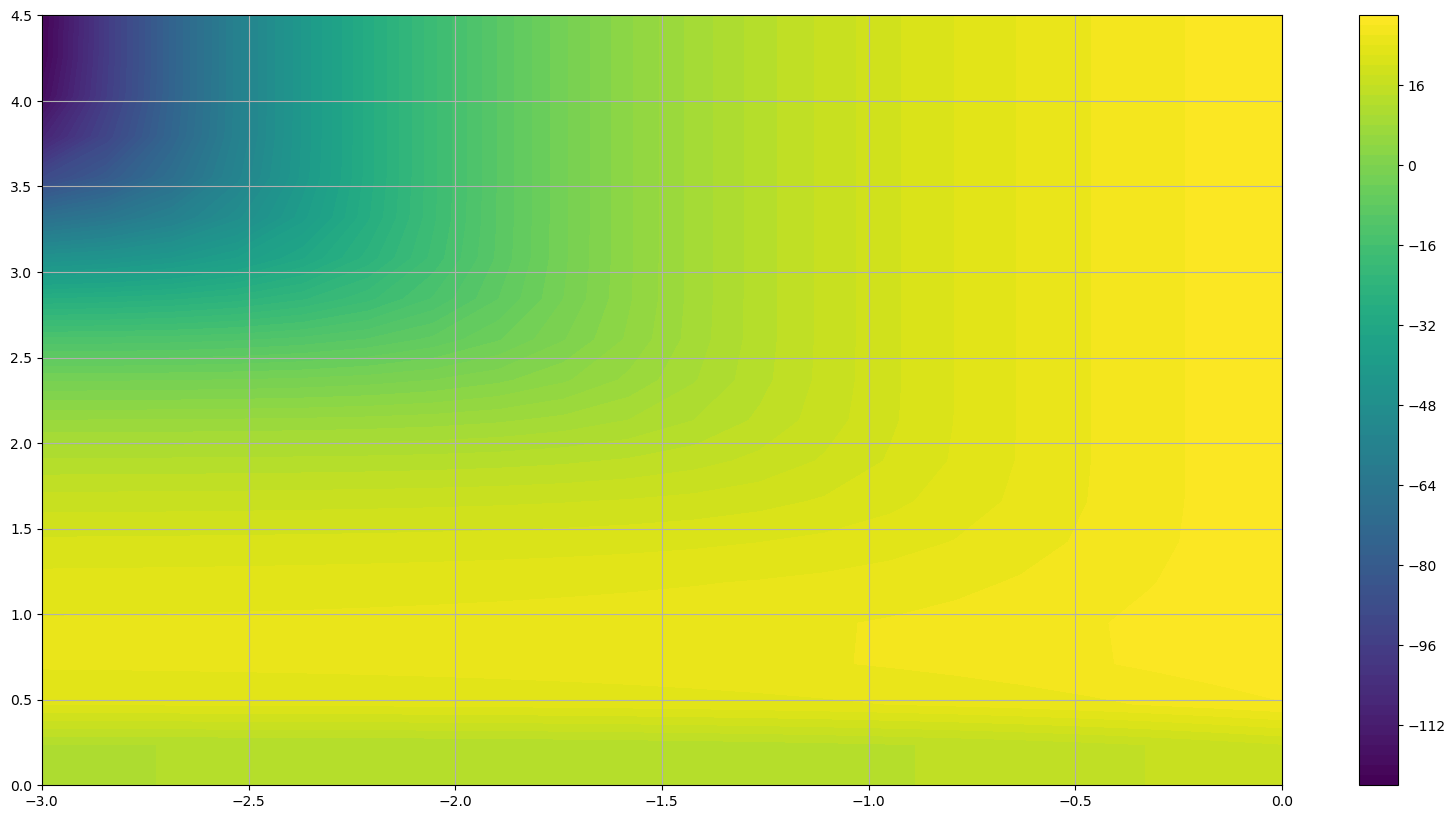

In [56]:
#make a contour plot of alpha varying between 0 and 1 and xi between 0 and 1000


a = np.linspace(0,3,20)
k = np.linspace(0,4.5,20)

alpha = 10**(-a)
xi = 10**k

mesh1,mesh2 = np.meshgrid(alpha, xi)
#plot unsing meshgrid


first_deriv_plot = np.zeros_like(mesh1)

for i in range(len(mesh1)):
    for j in range(len(mesh1[0])):
        first_deriv_plot[i][j] = first_deriv(x_0, d, mesh2[i][j],mesh1[i][j])

mesh1 = np.log10(mesh1)
mesh2 = np.log10(mesh2)



plt.figure(figsize=(20,10))
plt.contourf(mesh1,mesh2,first_deriv_plot, levels = 100)
plt.colorbar()
plt.grid()


In [25]:
x_0

0.045696721160940486

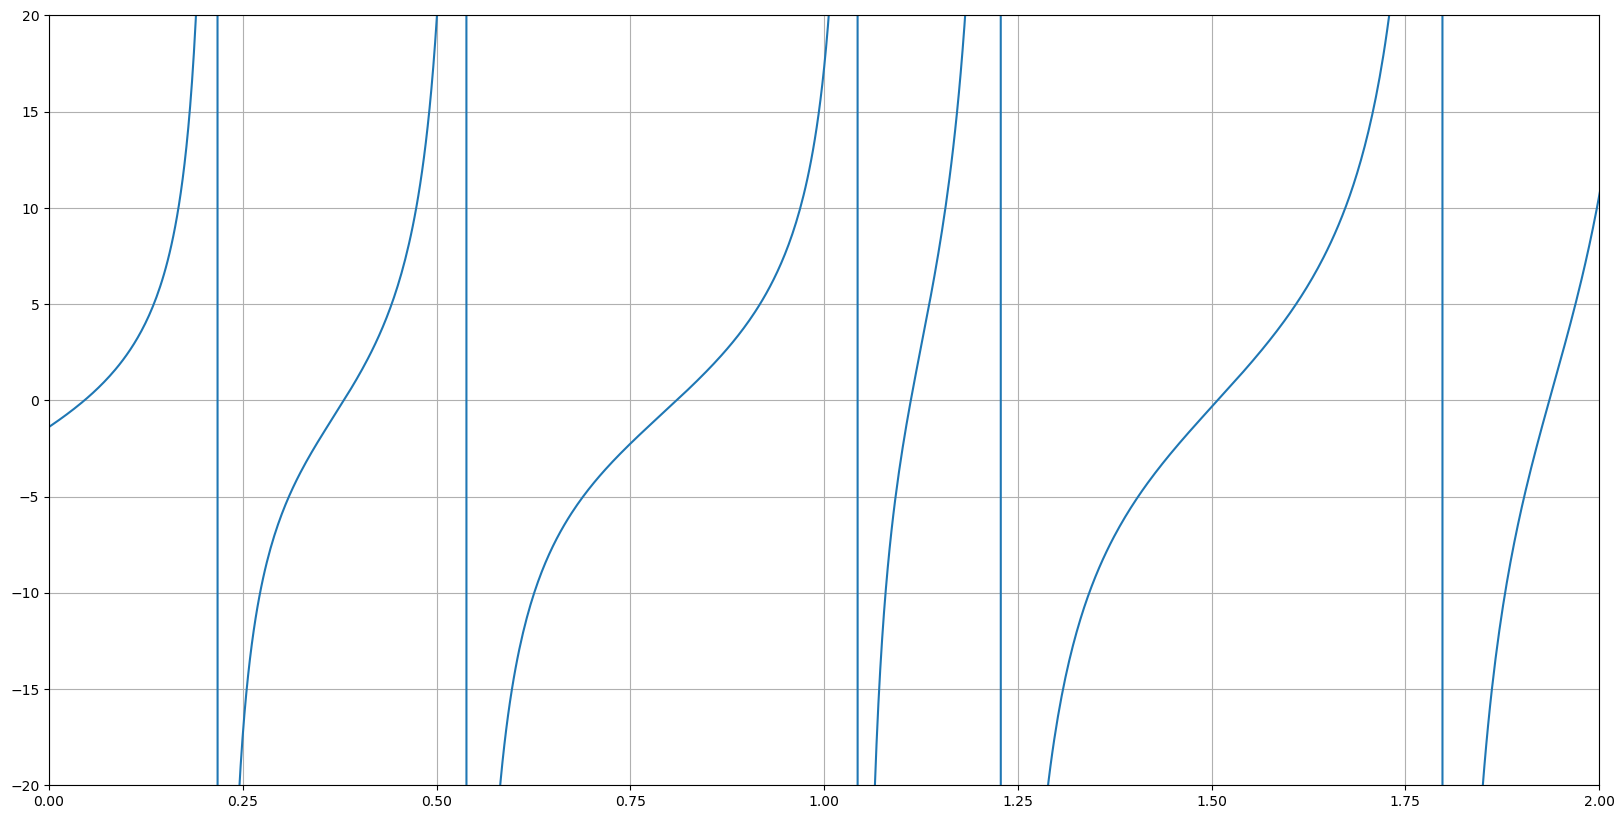

In [29]:
#plot q_2_plot vs zeta_plot

plt.figure(figsize=(20,10))
plt.plot(q_2_plot, zeta_plot)
plt.ylim(-20,20)
plt.xlim(0,2)
plt.grid()



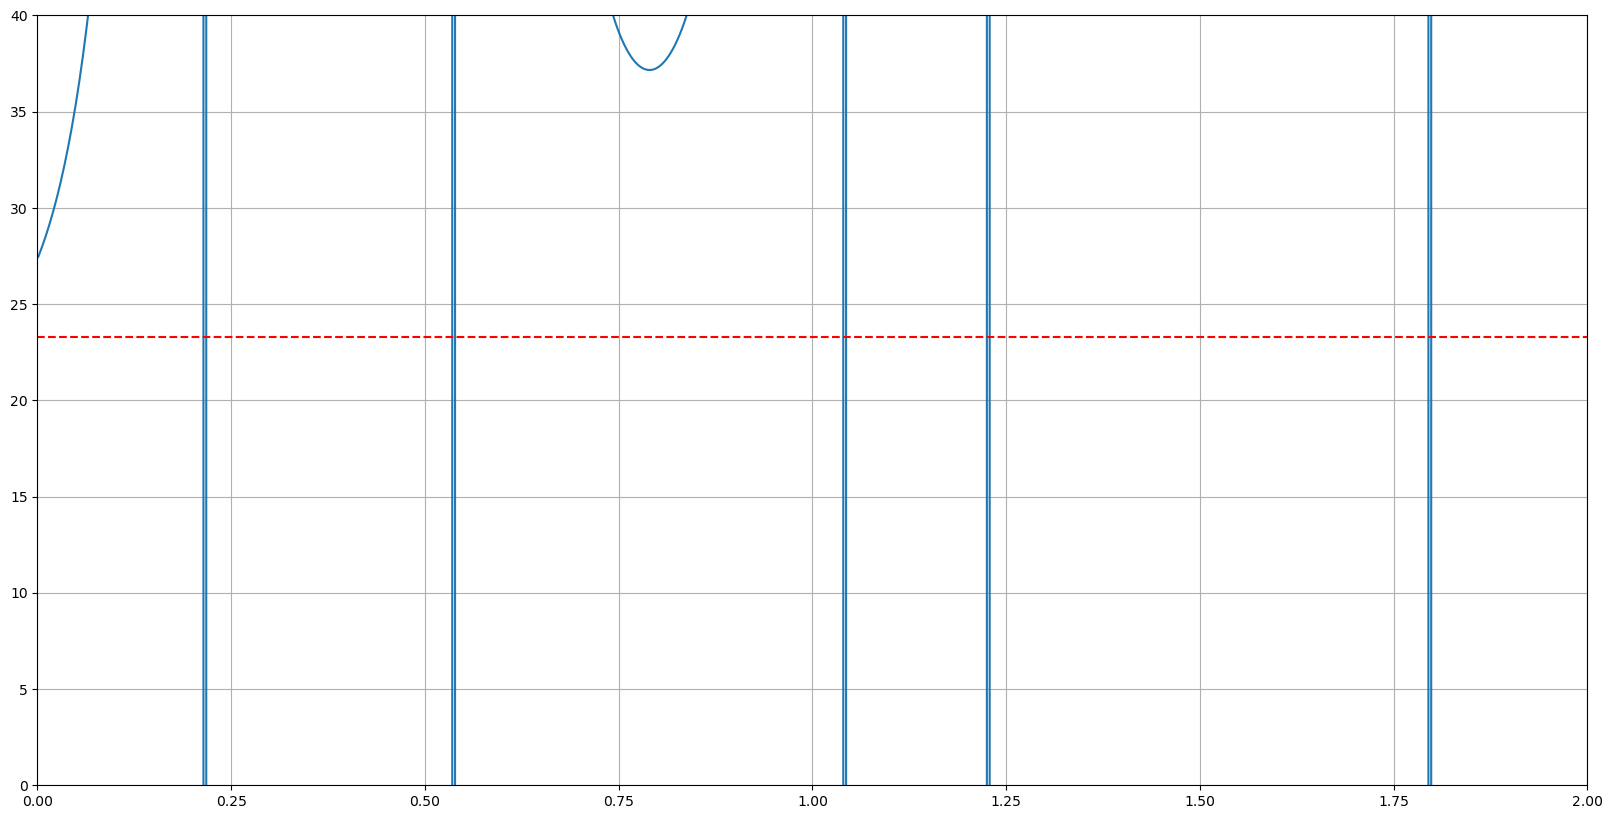

In [32]:
dx = np.diff(q_2_plot)[0]

dy_dx = np.diff(zeta_plot)/dx


plt.figure(figsize=(20,10))
plt.plot(q_2_plot[:-1], dy_dx)
plt.ylim(0,40)
plt.xlim(0,2)
plt.grid()

# Plot a horizontal line at y = 12.3
plt.axhline(y=first_deriv_plot[-1], color='red', linestyle='--')

plt.show()



In [13]:
x_0

0.6439411864814153

In [ ]:


def first_deriv(q_2_star=1.5, d = np.array([0,0,0]), cutoff= 9 ,  alpha = 0.1):
    '''
    Outputs derivative of the zeta correctly **ONLY** for d = [0,0,0] 
    where the expression is trivial to evaluate for all s derivatives.
    Crucially, this does not include the s! factor, for convenience
    when taylor expanding.
    d ≠ 0 can be evaluated but will be some approximation of the true result

    The inputs are x, the cutoff, the derivative order s and d
    '''

    ML = 4
    m_tilde_sq = (ML/np.pi)**2
    
    d_scalar = np.linalg.norm(d)
    s = 4*q_2_star + m_tilde_sq
    E = np.sqrt(d_scalar**2 + 4*q_2_star + m_tilde_sq)
    if d_scalar:
        beta_norm = d/np.linalg.norm(d)
        beta = d_scalar/E
        gamma = 1/np.sqrt(1-beta**2)
    else:
        beta_norm = d
        beta = 0
        gamma = 1


    #create spherical shell containing the n vectors
    rng = np.arange(-int(np.sqrt(cutoff))-1, int(np.sqrt(cutoff))+2)
    res = (rng[:,np.newaxis, np.newaxis]**2+rng[np.newaxis,:,np.newaxis]**2+rng[np.newaxis,np.newaxis,:]**2)
    X,Y,Z = np.meshgrid(rng,rng,rng, indexing = 'ij')
    coords = np.stack((X,Y,Z), axis=3)
    r = coords[res<=cutoff]


    ####### Use Rummakainen and Gottlieb's formula
    r_2 = np.einsum("ij,ij->i", r,r)
    r_parallel  = np.einsum("ij,j->i", r, beta_norm)
    #use braodcasting to multiply each of the dot products by the beta unit vector
    r_perp_sq = r_2 -r_parallel**2
    r_parallel_sq = r_parallel**2
    r_parallel_sq = 1/gamma**2*(r_parallel+ 1/2 * d_scalar)**2 
    r_sq = r_parallel_sq+ r_perp_sq
    D = r_sq-q_2_star
    terms = np.exp(-alpha*D)/(D)

    sum_terms = np.sum(terms)


    pv = 2.0*(np.pi**2)*np.sqrt(q_2)\
        * erfi(np.sqrt(alpha*q_2))\
        - 2.0*np.exp(alpha*q_2)\
        * np.sqrt(np.pi**3)/np.sqrt(alpha)
    
    return( sum_terms + pv)/np.sqrt(4*np.pi) 
